In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
df = pd.read_csv('./sample.csv')
df

,Infarc,Area,Group,X2,X3
0,0.119,0.34,3,0,0
1,0.190,0.64,3,0,0
2,0.395,0.76,3,0,0
3,0.469,0.83,3,0,0
4,0.130,0.73,3,0,0
5,0.311,0.82,3,0,0
6,0.418,0.95,3,0,0
7,0.480,1.06,3,0,0
8,0.687,1.20,3,0,0
9,0.847,1.47,3,0,0


In [163]:
y = df['Infarc'].values
x1 = df['Area'].values
x2 = df['X2'].values
x3 = df['X3'].values

In [164]:
def fit(x, y):
    X = np.vstack([np.ones(x.shape[1]),x]).T
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

In [165]:
def predict(x, w):
    X = np.vstack([np.ones(x.shape[1]), x]).T
    return X @ w

In [166]:
def rmse(y_preds, y):
    return np.sqrt(np.mean((y_preds-y)**2))

In [167]:
x = np.vstack([x1, x2, x3])
beta = fit(x,y)
y_preds = predict(x, beta)

y_preds

array([ 0.07376631,  0.25756281,  0.3310814 ,  0.37396725,  0.31270175,
        0.3678407 ,  0.44748585,  0.5148779 ,  0.60064959,  0.76606644,
       -0.10845042,  0.09372572,  0.17337087,  0.27752221,  0.24076291,
        0.25301601,  0.33266116,  0.36329391,  0.35716736,  0.36942046,
        0.22850981,  0.27155226,  0.44309565,  0.4492222 ,  0.424716  ,
        0.40633635,  0.39408325,  0.4859815 ,  0.55337355,  0.52886735,
        0.547247  ,  0.65752489])

In [168]:
print('Multiple Linear Regression coefficients')
for i,b in enumerate(beta):
    print(f'b{i} : {b:.2f}')
print(f'RMSE : {rmse(y_preds, y):.2f}')

Multiple Linear Regression coefficients
b0 : -0.13
b1 : 0.61
b2 : -0.24
b3 : -0.07
RMSE : 0.13


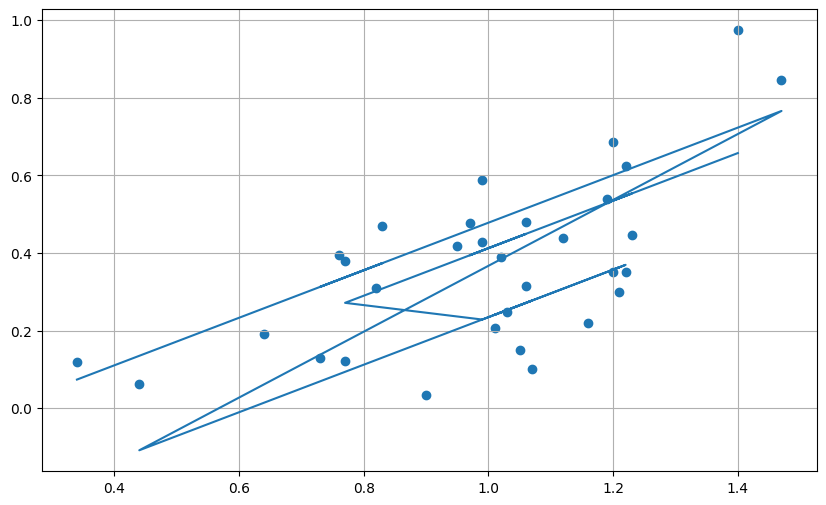

In [169]:
plt.figure(figsize=(10,6))
plt.scatter(x1, y)
plt.plot(x1, y_preds)
plt.grid(True)
plt.show()

In [170]:
df = pd.read_csv('./yield_data.csv')
df

,Temperature,Yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6
5,70,2.1
6,80,2.5
7,80,2.9
8,80,2.4
9,90,3.0


In [171]:
x = df['Temperature'].values
y = df['Yield'].values

In [172]:
def simple_linear_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    b1 = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
    b0 = y_mean - b1*x_mean
    return b0, b1

In [173]:
def poly_regression(x, y, degree):
    X = np.vstack([x**i for i in range(degree+1)]).T
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

In [174]:
def predict(x, w):
    y_pred = np.zeros(x.shape)
    for i in range(len(w)):
        if i==0:
            y_pred = w[i]
        else:
            y_pred+=w[i]*x**i
    return y_pred

In [175]:
def evaluate(y_preds, y):
    error = y_preds-y
    mse = np.mean(error**2)
    rmse = np.sqrt(mse)
    return mse, rmse

In [176]:
def plot_graph(x, y, y_preds):
    plt.scatter(x, y)
    plt.plot(x, y_preds)
    plt.grid(True)
    plt.show()

In [177]:
b0, b1 = simple_linear_regression(x, y)
print(f'Simple Linear Regression Coefficients\nb0 : {b0:.2f}\nb1 : {b1:.2f}')
beta = np.array([b0, b1])
y_preds = predict(x, beta)
mse, rmse = evaluate(y_preds, y)
print(f'MSE : {mse:.2f}\nRMSE : {rmse:.2f}')

Simple Linear Regression Coefficients
b0 : 2.31
b1 : 0.01
MSE : 0.13
RMSE : 0.36


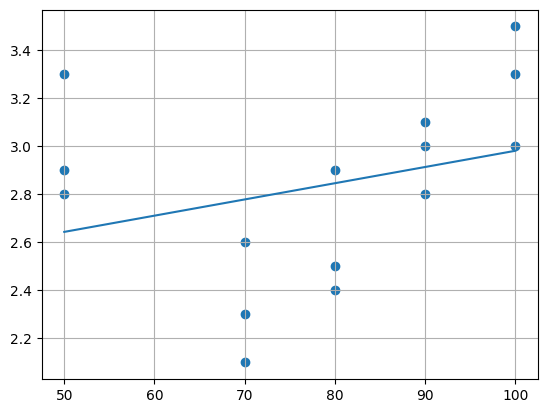

In [178]:
plot_graph(x, y, y_preds)

In [182]:
degree = 2
w = poly_regression(x, y, degree)
y_preds = predict(x, w)
mse, rmse = evaluate(y_preds, y)
print(f'Polynomial Regression Coefficients')
for i,wi in enumerate(w):
    print(f'w{i} : {wi:.4f}')
print(f'MSE : {mse:.4f}\nRMSE : {rmse:.4f}')

Polynomial Regression Coefficients
w0 : 7.9605
w1 : -0.1537
w2 : 0.0011
MSE : 0.0478
RMSE : 0.2186


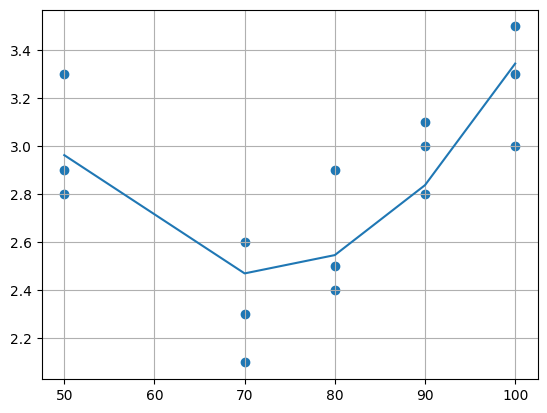

In [180]:
plot_graph(x, y, y_preds)